#0116

#model selection =>
#feature selection => 변수 selection 
#feature extraction => 텍스트 특징 추출 _ manifold

#preprocessing  learning => model => predict service
#4차혁명 - IOT ,Big Data,AI ,AR(증강현실),VR,MR

 * *  ann은 단층 퍼셉트론  XOR문제가 있고 이를 해결하고자  mlp  다층 퍼셉트론
 * 멀티레이어: XOR문제 해결, 정확도가 높아짐

#[MLP MUTI LAYER PERCEPTRON)]

- 이점 : 그냥 LAYER만 추가해도 정확해짐  
- 문제점 : 기울기 소멸_ 신경망은 곱(계속 0-1 사이값을 계속 곱해서 !)
- LONG SHORTERM MEMORY(lstm) _ 소실되는 기울기를 기억? 

#[preprocessing]
- 신경망은 전처리(정규화)를 해주지않으면  발산하게됨
    - Preprocessing에서 정규화를 필수적으로 해줘야함 

#[learning]
- (500x30) * (30x1) => 500x1 
    -  30개의 변수중 1개 도출-> 각변수가 끼치는 영향력을 모두 계산(단순히 하나뽑는게아님)
    - fully connected :  데이터가 1차원으로 들어옴 
- 변수가 많을 때에는 한번에 확 줄이면 데이터의 손실이 너무 많아짐 
    - 그래서 중간에 레이어를 하나 넣어줌 - 순전파, 역전파
            - 순전파 : yhat 예측하는과정 _순차적
            - 역전파 : 가즁치를 조절하는 과정 _역순

* 러닝과정과 프리딕트 과정에서 모두 사용된다 그러나 프리딕트 과정에서는 역전파 과정은 안함
 - activation function(활성화함수) :분류나 예측을 결정한다 & 몇개로 분류할지 
    - idenitiy
    - sigmoid :( 0~1 ) 2개분류
    - soft max : 클래스가 여러개인 것을 분류할 때 사용

#순전파
#MLP classifier
- ( y hat - y )^2 : 예측값- 실제값 의 제곱 : 차이를 줄여가야함 

#역전파
    #solver
- learning rate (학습률) : solver가 해줌 _ 어떠한 solver를 선택할지와 초기값 선택이 중요 ..!_ 하이퍼파라미터임 
- 가중치 계산하는 방법 을 solver를 통해 조절- 
- solver 는 sgd: 확률적, 그라디안 , 디센트
           adam: 학습률과 가중치 조절가능
 
cf) support vector machine은 차원 확대를 좋아하는 model 

#SVM 논리 : 고차원으로 데이터 확대 (고채원을 선호하는모델)
#정확도가 높아 과적합을 방지 
#SVC(CLASSIFIER)  SVR(REGRESSOR)
 

# MLP : multi layer perception 

In [5]:
#주피터에서만 사용함
%matplotlib inline  
import matplotlib.pyplot as plt  #시각화할 때 사용
import mglearn #학습도움을위해 만들어진 패키지 
from sklearn.neural_network import MLPClassifier  # mlp regressor / mlp classifier 둘다 있음
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y= make_moons(n_samples=100, noise =0.25, random_state=3) #반달모양 데이트를 만듬 #밑에 그래프에서 



#cf) mds (행렬곱) : 직교하는 2,3차원 : 2차원3차원 특징추출 _ 램덤으로 사이즈를 채운후 행렬제곱을하면 =>정방행렬
#고유값분해 = 고유치,고유벡터 (정직교)

#forward propagation 순전파 : 예측과정 (가중치를 모름_랜덤하기 초기화 _ 그래서 이것을 역전파를 통해  학습함_)

#backward propagation 역전파: 가중치 학습과정 (cost function 기울기 , learnin rate 학습)
#mlp :multi layer perception : FFNN(Feed forward neural network)
#solver :미분해주고 learning rate 조절해준다  그리고 가중치 조절




C:\Users\ICT01_14\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, '특성1')

C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


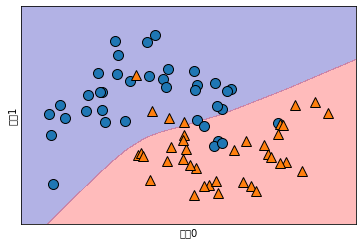

In [2]:
#stratify 층화변수 선택법
# 랜덤으로하는것이 아닌  0.75 0.25 비율을 기본으로 하되 어느정도 유동성이 있는 변수 선택방법

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42) 
#multilayer 쓰는 이유 : xor문제를 해결하고 , 레이어가 많으면 정밀도가 자동으로 높아짐
mlp =MLPClassifier(random_state=0).fit(X_train,y_train)  #이데이터에 맞게 가중치생성_mlpclassifier가 레이어 자동 지정 _ 
# mlpc가 가중레이어 (가중치 부여)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3) #seperator 있는 점들을 다 넣어봄? 
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train) #scatter 점찍는거 
plt.xlabel("특성0")
plt.ylabel('특성1')

In [6]:
mlp.get_params() # 디폴트값 확인


#activation': 'relu' => 0이하 제거하는 활성화 함수 (activation function)사용하면 =>속도가 빨라짐 
# 'learning_rate': 'constant', 변하지않는다
# 'max_iter': 200, 반복횟수 / 한번 반복하는것을 epoch(에포크)라고한다 
# 'solver': 'adam' , 아담 : learning rate 조절 , Momentum 사용하는  optimizer(최적화)


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [9]:
mlp.n_layers_

3

In [12]:
mlp.coefs_  #coefficient
#bias  계수들이 0으로 가는것을 방지해서 처음에 1로 세팅

[array([[ 1.96423650e-01,  1.86414048e-01,  2.73074871e-02,
          1.32154297e-01, -9.48047217e-05,  2.82807555e-03,
         -7.29479240e-02,  1.45878653e-01,  2.97837159e-01,
         -1.12611776e-01,  2.34714552e-01,  1.30702586e-01,
         -2.85623212e-02,  1.12399918e-01, -1.71442282e-01,
         -3.24829063e-01, -3.85153290e-01,  2.38832765e-01,
          2.13193712e-01,  2.63746115e-01,  1.70653255e-01,
          7.41106685e-02,  1.04573476e-01,  6.73150355e-02,
         -3.77696555e-01,  1.10071889e-01,  4.88102808e-03,
          3.03409150e-01, -6.64267214e-02, -1.08723630e-01,
         -2.67443736e-01,  2.19702964e-01, -9.77933350e-02,
          3.95350833e-05, -1.67873856e-01,  1.32818304e-01,
          2.23922646e-02, -1.13671191e-02,  2.94106612e-01,
          3.48486041e-02, -1.28573692e-01, -1.62111791e-05,
          1.34093216e-01, -3.48957410e-01,  1.73951614e-01,
          2.50280090e-02, -3.77490782e-01, -3.22208104e-01,
         -8.09493846e-02, -4.14861544e-0

In [13]:
mlp.classes_

array([0, 1], dtype=int64)

In [14]:
mlp.n_outputs_

1

Text(0, 0.5, '특성1')

C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


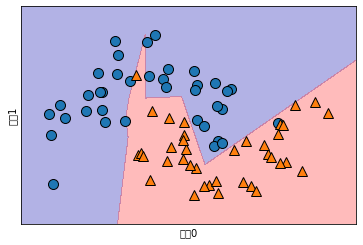

In [20]:
mlp = MLPClassifier(solver ='lbfgs',random_state=0, hidden_layer_sizes=[10]) #레이어 하나

mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3) #seperator 있는 점들을 다 넣어봄? 
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train) #scatter 점찍는거 
plt.xlabel("특성0")
plt.ylabel('특성1')

In [21]:
mlp.coefs_ 



#아담과 비교했을 떄  아담은 일반화를 하려하고  lbfgs 는 과적합의 위험이 있다 너무 세세함
# 2 x 10   bias가 10

#위에게 2x10 이다 :  밑에게 10 x1 

[array([[ -4.9818262 ,  22.94559802,  11.2952523 ,  42.91350414,
          -0.10638399,  12.450265  ,  -0.08696973,  18.40556868,
           5.91473827,  -0.09957052],
        [  2.76470468, -10.24958482,   2.03364121,  -6.10960884,
          -0.59774414,  -0.57889683,  -0.66855653,  -2.51508397,
         -16.13762386,  -1.56805821]]), array([[ -7.44132317],
        [ 14.92540772],
        [ -9.50395538],
        [-16.8715502 ],
        [ -0.70036373],
        [  4.49798076],
        [  0.16314654],
        [ 24.89345945],
        [ -8.48263277],
        [ -2.66394106]])]

Text(0, 0.5, '특성1')

C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


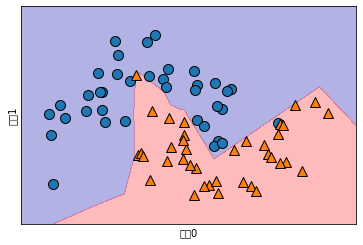

In [22]:
 #hidden_layer_sizes=[10,10]
    
#레이어 많이주면 10개이상주면 기울기 소실 문제 
#많이 줄수록 데이터를 더 상세하게 나눔 
    
mlp = MLPClassifier(solver ='lbfgs',random_state=0, hidden_layer_sizes=[10,10])  #레이어 2개 (숫자개수) #출력차수 지정 
#히든 레이어 사이즈 지정지 무엇을 지정하는건지 ? 
#입력차수는 지정x _> 입력데이터에서 결정됨  / 출력차수만 지정해주면됨  (추출할 특징 수)
#2x10 10x10
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3) #seperator 있는 점들을 다 넣어봄? 
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train) #scatter 점찍는거 
plt.xlabel("특성0")
plt.ylabel('특성1')

In [23]:
# hidden_layer_sizes=[10,10]

mlp.coefs_ 


#위에게 2x10 이다 :  밑에게 10 x10 : 10으로나감

[array([[-0.15855127,  1.65408267, -0.74007897, -3.95416422, -0.1076738 ,
          7.37539571, -0.08802416,  9.81913382,  7.99356564,  0.25296731],
        [-1.40130717,  1.17896331,  4.7764105 , -1.35478871, -0.60499122,
         -3.93952976, -0.67666214,  0.47959084,  0.40007515, -0.46719005]]),
 array([[-2.57212608e-01,  2.54649014e-01, -1.14412726e+00,
          1.00730872e+00, -5.41076910e-01, -5.93907060e-01,
          3.78895783e-01,  7.68311646e-02, -2.08326606e+00,
          4.07711948e+00],
        [-1.53481421e-01, -6.77908766e-02, -4.28876578e-01,
         -1.27504242e-01,  1.82185280e-01,  4.66638824e-01,
         -1.69792897e+00, -4.13108923e-01, -6.64731654e-01,
          3.06872837e+00],
        [ 7.66868751e-02, -6.58955426e-02,  1.70524181e+00,
         -7.43717100e-01, -3.18039302e-01, -5.11723931e-01,
          1.60457073e+00, -2.69518041e-01,  1.28711884e-01,
         -7.33164618e-01],
        [-3.72560686e-01, -4.43794280e-01,  1.33587069e+00,
         -9.6216049

Text(0, 0.5, '특성1')

C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


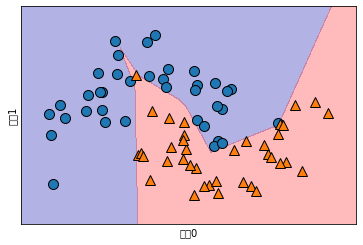

In [26]:
 #hidden_layer_sizes=[5,10]
    
mlp = MLPClassifier(solver ='lbfgs',random_state=0, hidden_layer_sizes=[5,10,2])  
#히든 레이어 사이즈 지정지 무엇을 지정하는건지 ? 
#입력차수는 지정x _> 입력데이터에서 결정됨  / 출력차수만 지정해주면됨  (추출할 특징 수)
#2x10 10x10

mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3) #seperator 있는 점들을 다 넣어봄? 
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train) #scatter 점찍는거 
plt.xlabel("특성0")
plt.ylabel('특성1')

In [25]:
#BLACK BOX  :계수 

#hidden_layer_sizes=[5,10]

mlp.coefs_  

# 5,10 
#출력차수 2x5  ,5(얘는 자동결정)x10
#레이어 사이즈를 지정 출력차수만 지정 
#첫번째 사이즈는 앞 데이터에서 결정해줌


[array([[  9.58312525,   8.01326616,   6.38324831, -13.90108441,
          -0.14108705],
        [ -0.15831136,   3.390681  ,   2.98670712,  -1.16530986,
          -0.21540178]]),
 array([[-1.02891626, -2.33889475,  2.12972828,  0.52897872,  2.23957507,
          1.41874928,  0.148644  ,  0.34437075,  7.28226381, -0.48186345],
        [-0.81302935, -0.46973462, -0.01110334, -0.25503688, -0.09567239,
          1.07167377,  2.44161204,  0.06323068,  3.11978885, -0.63798754],
        [-0.40855756, -1.01425374,  1.89146083,  0.85156843,  2.19939312,
          1.2517127 , -2.10707856,  0.65408844,  1.40739894,  0.20930688],
        [-0.68852893,  2.66493476, -1.5262621 ,  0.33742273, -3.40176253,
         -2.50208501, -0.81709543,  3.96204422,  0.37740612, -0.58969023],
        [-0.4275745 ,  0.19328921, -0.31145316, -0.04253044, -0.32264591,
         -0.43052851, -0.49187581,  0.19735584, -0.45677027, -0.38304485]]),
 array([[-0.65227553],
        [-3.54750216],
        [-3.3272718 ],
    

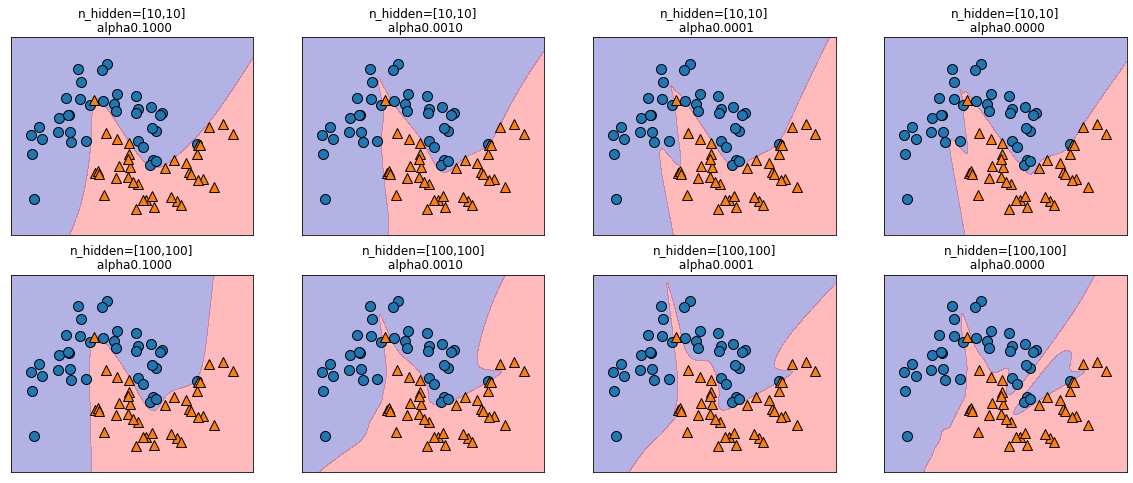

In [33]:
fig,axes = plt.subplots(2,4,figsize =(20,8))
for axx, n_hidden_nodes in zip(axes,[10,100]): #히든 노드를 10 or 100개
    for ax,alpha in zip(axx,[0.1,0.001,0.0001,0.00001]):
        mlp = MLPClassifier(solver='lbfgs',random_state=0,activation='tanh',
                            hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha = alpha) #레이어 사이즈 = 다차방정식의 차수
        mlp.fit(X_train,y_train)
        
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True, alpha=.3,ax=ax)#경계선
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title('n_hidden=[{},{}]\n alpha{:.4f}'.format(n_hidden_nodes,n_hidden_nodes,alpha))

In [ ]:
# 신경망은 다차 방정의 비선형회귀 

#다중회귀는 변수가 많단이야기
#다항회귀는 비선형
 

In [38]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('유방암 데이터의 특성별 최대값:\n{}'.format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최대값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [42]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

mlp = MLPClassifier(random_state=42) #디폴트 
mlp.fit(X_train,y_train) #가중치 결정

print("훈련세트 정확도 :{:.2f}".format(mlp.score(X_train,y_train))) #94

print("테스트세트 정확도 :{:.2f}".format(mlp.score(X_test,y_test))) #92


#훈련정확도 < 테스트세트 정확도 | 과소적합 : 데이터를 늘려야함

# 훈련정확도 > 테스트세트 정확도 | 과대적합 : 하이퍼파라미터 조정


훈련세트 정확도 :0.94
테스트세트 정확도 :0.92


In [43]:
mean_on_train = X_train.mean(axis=0) #평균
std_on_train = X_train.std(axis=0) #표준편차

#z점수 표준화 
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled =(X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train) #피팅

print('훈련 세트 정확도 :{:.3f}'.format(mlp.score(X_train_scaled,y_train))) #:0.991

print('테스트 세트 정확도: {:.3f}'.format(mlp.score(X_test_scaled,y_test))) #: 0.965

훈련 세트 정확도 :0.991
테스트 세트 정확도: 0.965


C:\Users\ICT01_14\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [50]:
#반복횟수 늘렸음  #나쁜 예 
mlp = MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled,y_train)

print('훈련 세트 정확도 :{:.3f}'.format(mlp.score(X_train_scaled,y_train)))

print('테스트 세트 정확도: {:.3f}'.format(mlp.score(X_test_scaled,y_test))) 

훈련 세트 정확도 :1.000
테스트 세트 정확도: 0.972


In [53]:
#일반화되었다  훈련과 테스트가 비슷한게 좋다 
#알파값 조정(규제 )

mlp =MLPClassifier(max_iter=1000,alpha =1 , random_state=0)
mlp.fit(X_train_scaled,y_train)

print('훈련 세트 정확도 :{:.3f}'.format(mlp.score(X_train_scaled,y_train))) #:0.991

print('테스트 세트 정확도: {:.3f}'.format(mlp.score(X_test_scaled,y_test))) #: 0.965

훈련 세트 정확도 :0.988
테스트 세트 정확도: 0.972


In [51]:
mlp.coefs_

[array([[ 0.02600236,  0.09653788,  0.10961696, ..., -0.20203778,
          0.10581246, -0.09165405],
        [ 0.12388627, -0.31400036,  0.091306  , ..., -0.18707179,
         -0.25342788, -0.37946718],
        [-0.07813546,  0.0812314 ,  0.01479622, ...,  0.15834187,
          0.16351273,  0.29540421],
        ...,
        [-0.11059755,  0.0434009 ,  0.1892709 , ...,  0.07661888,
          0.09727001, -0.09138333],
        [-0.05145886,  0.00388055, -0.10113569, ..., -0.00107619,
          0.11816543, -0.09396539],
        [-0.29556592, -0.23572591,  0.20424649, ..., -0.15164754,
          0.04428551, -0.17900693]]), array([[-0.30423257],
        [ 0.41899071],
        [-0.32290961],
        [ 0.34117245],
        [ 0.22656971],
        [-0.2000485 ],
        [ 0.20942745],
        [ 0.15080189],
        [ 0.61715352],
        [-0.38417044],
        [-0.2544667 ],
        [ 0.25711387],
        [-0.30380726],
        [ 0.29273269],
        [-0.04481105],
        [-0.14245117],
      

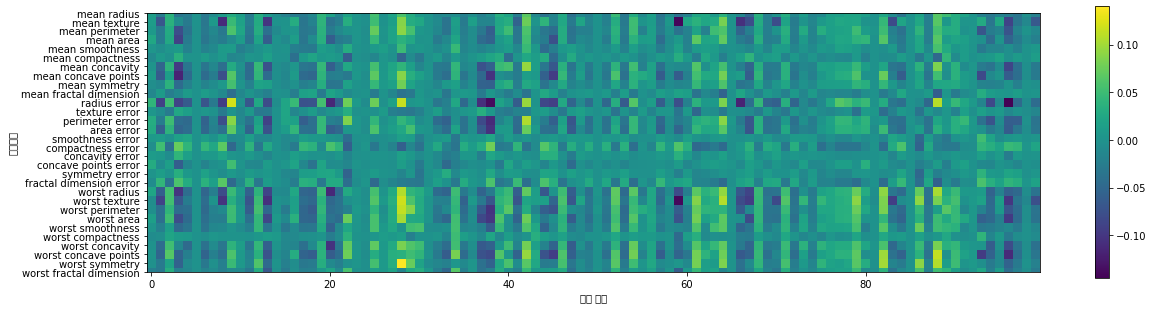

In [55]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('은닉 유닛')
plt.ylabel('입력특성')
plt.colorbar()

In [67]:
#와인데이터 
import pandas as pd
wine = pd.read_csv('wine_data.csv')
print(wine)

     1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  \
0    1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
1    1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
2    1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
3    1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
4    1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05   
..  ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
172  3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
173  3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
174  3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
175  3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
176  3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

     3.92  1065  
0    3.40  1050  
1    3.17  1185  
2    3.45  1480  
3  

# wine 문제

In [74]:
import pandas as pd

wine = pd.read_csv('./wine_data.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash",
                                             "Alcalinity_of_Ash", "Magnesium", "Total_phenols",
                                             "Falvanoids", "Nonflavanoid_phenols",
                                             "Proanthocyanins", "Color_intensity", "Hue",
                                             "OD280", "Proline"], encoding="utf-8") 

In [96]:
wine.describe()

wine.shape #샘178 

(178, 14)

## 내답

In [93]:
mlp =MLPClassifier(max_iter=1500,alpha =1.2 , random_state=0)

X_train,X_test,y_train,y_test = train_test_split(wine.iloc[:,1:],wine.Cultivator,random_state=42) 

#z점수 표준화 
mean_on_train = X_train.mean(axis=0) #평균
std_on_train = X_train.std(axis=0) #표준편차

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled =(X_test - mean_on_train) / std_on_train

mlpwine = MLPClassifier(solver='adam',random_state=17,hidden_layer_sizes=[10,10])
mlpwine.fit(X_train_scaled,y_train)
print("훈련세트 정확도 :{:.2f}".format(mlpwine.score(X_train_scaled,y_train))) #94
print("테스트세트 정확도 :{:.2f}".format(mlpwine.score(X_test_scaled,y_test))) #92



훈련세트 정확도 :0.98
테스트세트 정확도 :0.93


C:\Users\ICT01_14\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## 쌤답

In [1]:

X = wine.drop('Cultivator',axis =1)
y = wine['Cultivator']

NameError: name 'wine' is not defined

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y) #75 / 25 %

In [113]:
print(y.unique())

[1 2 3]


In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #결과: copy=True : 원본은 그대로 둬라 false면 원본을 수정해라, with_mean=True, with_std=True)
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
##신경망 가동
from sklearn.neural_network import MLPClassifier
#디폴트 hldden 레이어 (00,)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
           # 모델 생성완료 
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [109]:
#평가


#precision 정밀도 : TP/ (TP+FP) : 예측을 중심으로 생각
#reacall 재현률 : TP/(TP+FN) : 실제값을 중심으로 생각 
#fl-score: 2*(precision*recall)/(precision+recall)

from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix
predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


# 1, 2, 3 의 의미 UNIQUE
# support 는 ?  각 품종의 총 갯수이고 
# 행렬의 대각선이 맞춘개수 
#macro avg : 평균 위에 값들 평균
#weighted avg : 가중 평균

[[15  0  0]
 [ 1 17  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



(13, 30)
(30, 30)
(30, 30)


Text(0, 0.5, '입력특성')

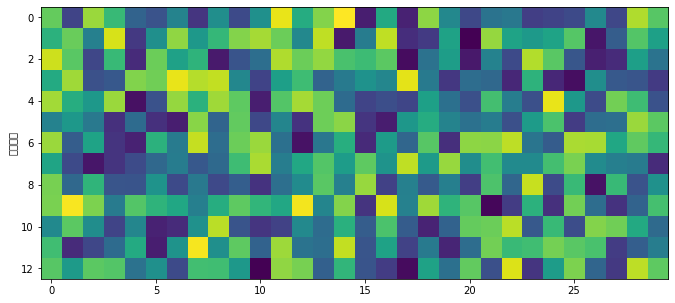

In [116]:
print(mlp.coefs_[0].shape) #13 x 30
print(mlp.coefs_[1].shape)# 30 x 30
print(mlp.coefs_[2].shape)#30 x 30

plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.xlabel('은닉 유닛')
plt.ylabel('입력특성')


# NMF(Non-negative matrix factorization ) : 비음수 행렬분해

- PCA는 음수와 양수의 차이를 상계해서 처리
- NMF는 양수 데이터에 적용 :  음성 데이터, signal



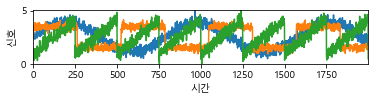

In [136]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel('시간')
plt.ylabel('신호')
plt.margins(0)

In [137]:
## 노이즈 추가 : 전송 과정에서 데이터에 노이즈가 추가됨  
import numpy as np
A = np.random.RandomState(0).uniform(size =(100,3))
X = np.dot(S,A.T)
print('측정 데이터 형태 :{}'.format(X.shape))

측정 데이터 형태 :(2000, 100)


In [138]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=3,random_state=42)  # 주황 녹색 파랑 

S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태 :{}".format(S_.shape))

복원한 신호 데이터 형태 :(2000, 3)


In [141]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
H=pca.fit_transform(X)

In [142]:
from matplotlib import font_manager,rc
font_name =font_manager.FontProperties( fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

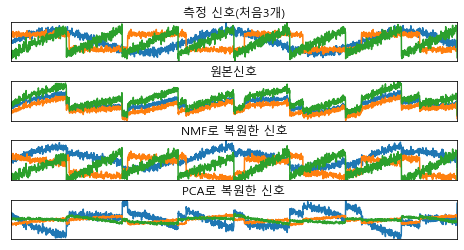

In [146]:
#원본,노이즈, NMF, PCA
models =[S,X,S_,H] #노이즈 : 양수데이터는 노이즈를 제거못함
names = ['측정 신호(처음3개)',
        '원본신호',
        'NMF로 복원한 신호',
        'PCA로 복원한 신호']

fig,axes = plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace':.5},subplot_kw ={'xticks':(),'yticks':()})

for model,name,ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')
    ax.margins(0)

# 군집분석 시각화